# Daily Spending Trends Among Customers

## Data Set : https://www.kaggle.com/datasets/samratp/creating-customer-segments

### In this analysis, we used a dataset containing customer spending amounts across various product categories. The primary objective was to identify patterns and clusters within the customer base to better understand their purchasing behaviors.




In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans, MeanShift, AffinityPropagation, SpectralClustering
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, silhouette_score
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
import umap
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split


#reading the dataset from drive
data=pd.read_csv('customers.csv')
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicatessen      440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [59]:
#nominal features
# Channel: {Hotel/Restaurant/Cafe - 1, Retail - 2} (Nominal)
#Region: {Lisbon - 1, Oporto - 2, or Other - 3} (Nominal)
unique_regions = data['Region'].unique()
unique_channels = data['Channel'].unique()
print(unique_regions)
print(unique_channels)

[3 1 2]
[2 1]


In [60]:
data.isnull().sum()
#there are no null values

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

In [61]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [62]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [63]:
data.shape


(440, 8)

### Feature Engineering 
#### remove channel and region

In [64]:
featured_data = data.drop(["Channel","Region"],axis=1) # Dropping 'Channel' , 'Region' as it's not a feature for clustering

In [65]:
# scaling numerical variables


# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(featured_data)


# Exploratory Data Analysis

In [66]:
#To find missing values
featured_data.count()

Fresh               440
Milk                440
Grocery             440
Frozen              440
Detergents_Paper    440
Delicatessen        440
dtype: int64

In [67]:
#To find missing values
featured_data.isnull().sum()

Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

In [28]:
#identify datatypes
featured_data.dtypes

Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicatessen        int64
dtype: object

In [69]:
#describe features
featured_data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [68]:

#Identifying duplicate records
print(featured_data.duplicated().sum())

0


In [70]:
featured_data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


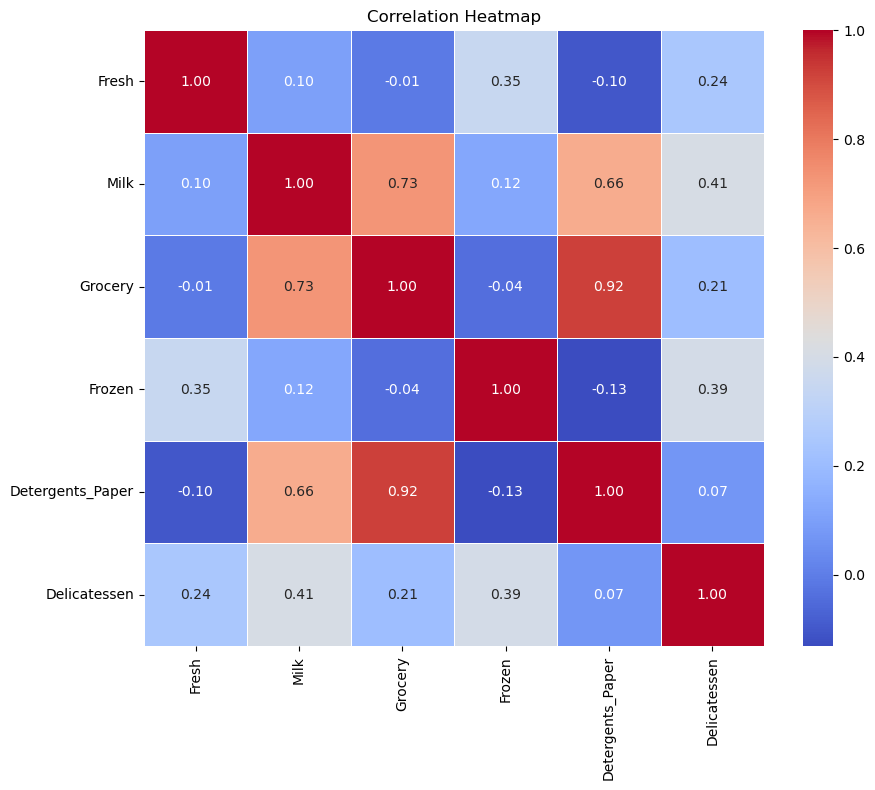

In [71]:

data_corr = featured_data.corr()
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(data_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### based on heat map result,
### groceries, detergents papers & milk  has strong coreleation 
### frozen, delicatessen, milk has moderate coreleation 
### frozen, grocery & detergents papers has weak coreleation



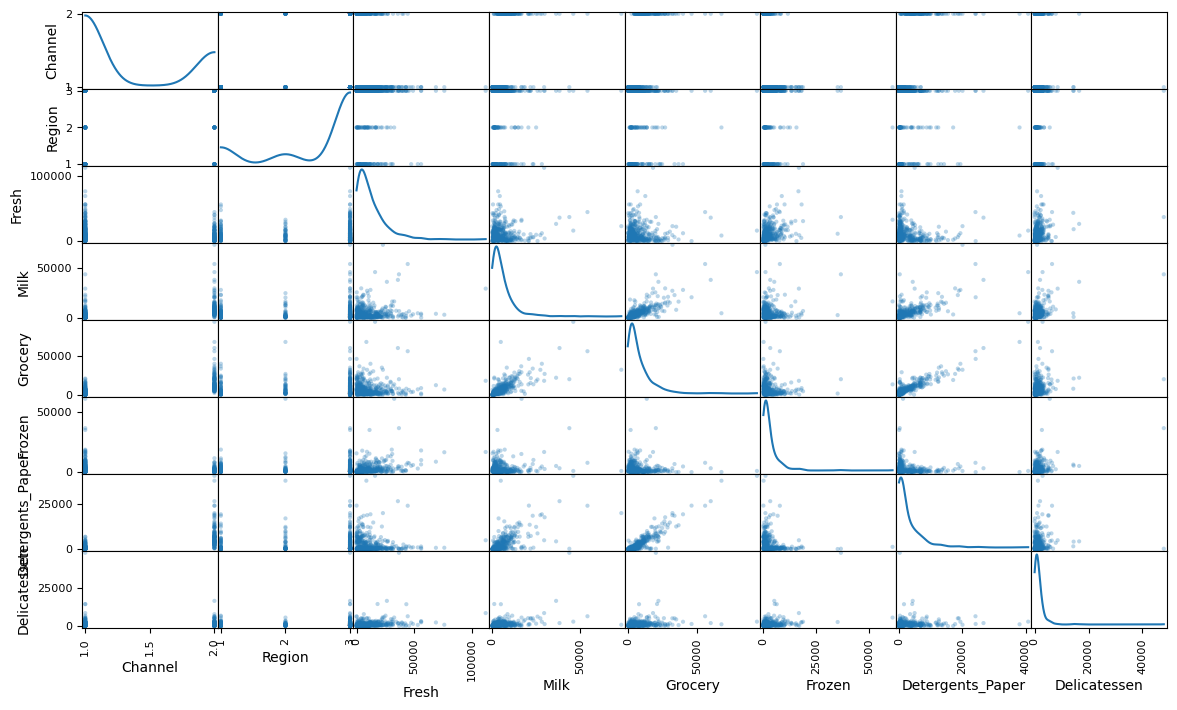

In [72]:
# Produce a scatter matrix for each pair of features in the data
pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

## Determine optimal value of K number of cluster


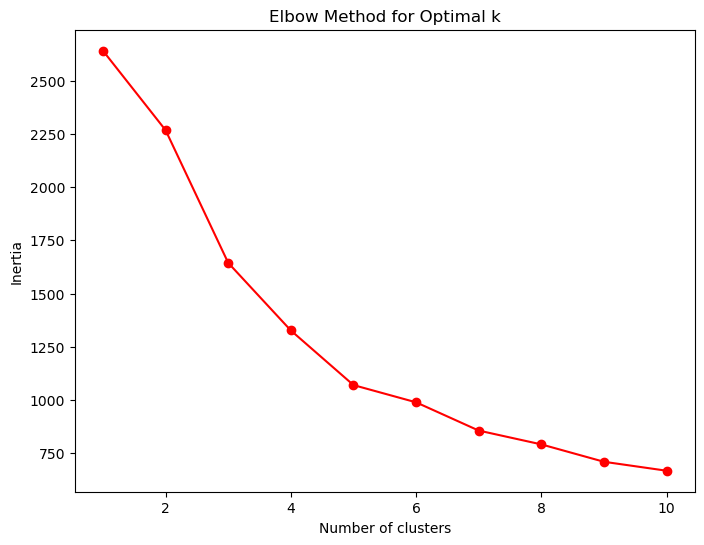

In [73]:
# Use the Elbow method to find the optimal number of clusters
inertia = []
K = range(1, 11)  # Testing k values from 1 to 10

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow curve
plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'bo-', color='red')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

### The optimal number of clusters is 5, where the inertia starts to decrease at a slower rate. 
### At this point on the curve resembles an "elbow".

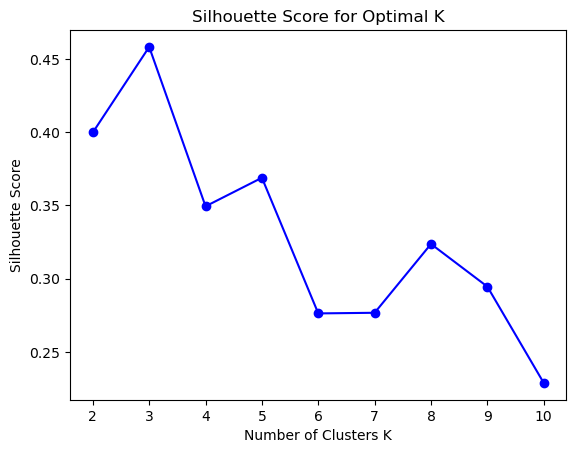

K = 2, Silhouette Score = 0.3998
K = 3, Silhouette Score = 0.4583
K = 4, Silhouette Score = 0.3494
K = 5, Silhouette Score = 0.3689
K = 6, Silhouette Score = 0.2762
K = 7, Silhouette Score = 0.2767
K = 8, Silhouette Score = 0.3237
K = 9, Silhouette Score = 0.2945
K = 10, Silhouette Score = 0.2288


In [74]:
## Compute  silhouette scores for a range of K
silhouette_scores = []
K_range = range(2, 11) # K must be aleast 2
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state =42).fit(scaled_features)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(scaled_features, cluster_labels)
    silhouette_scores.append(silhouette_avg)
## plot the silhouette scores
plt.plot(K_range, silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal K')
plt.show()

for k, score in zip(K_range, silhouette_scores):
    print(f'K = {k}, Silhouette Score = {score:.4f}' )
    


### the optimal number of clusters based on the silhouette score is 3.

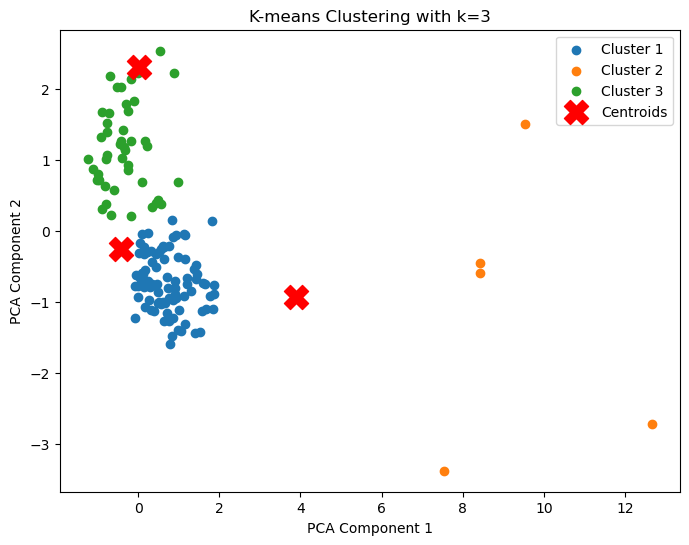

In [75]:
# Run K-means clustering with k = 3
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_features)

# Assign cluster labels to the original data
data['Cluster'] = kmeans.labels_
centroids = kmeans.cluster_centers_

# Reduce the dimensionality to 2D using PCA for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

# Plotting the clusters
plt.figure(figsize=(8, 6))

# Scatter plot for each cluster
for i in range(3):
    plt.scatter(pca_components[cluster_labels == i, 0], 
                pca_components[cluster_labels == i, 1], 
                label=f'Cluster {i+1}')

# Plot the centroids
centroids_2d = pca.transform(centroids)
plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1], 
            s=300, c='red', label='Centroids', marker='X')

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-means Clustering with k=3')
plt.legend()
plt.show()

In [76]:

# Assume scaled_features is your feature matrix and labels are available
# Splitting just the features (no labels)
X_train, X_test = train_test_split(scaled_features, test_size=0.2, random_state=42)

# Dictionary to store silhouette scores
silhouette_scores = {}

# 1. PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled_features)
silhouette_scores['PCA'] = silhouette_score(scaled_features, KMeans(n_clusters=4, random_state=42).fit_predict(X_pca))

# 2. t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(scaled_features)
silhouette_scores['t-SNE'] = silhouette_score(scaled_features, KMeans(n_clusters=4, random_state=42).fit_predict(X_tsne))

# 3. UMAP
umap_reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_reducer.fit_transform(scaled_features)
silhouette_scores['UMAP'] = silhouette_score(scaled_features, KMeans(n_clusters=4, random_state=42).fit_predict(X_umap))


In [42]:
# Print silhouette scores
for method, score in silhouette_scores.items():
    print(f'{method}: Silhouette Score = {score:.4f}')

PCA: Silhouette Score = 0.3559
t-SNE: Silhouette Score = 0.1170
UMAP: Silhouette Score = 0.1278


# Different dimensionality reduction techniques  with Silhouette Score

### PCA performs the best in terms of preserving the cluster structure, as indicated by its higher silhouette score of 0.3559.

### t-SNE and UMAP both have lower silhouette scores (0.1170 and 0.1278, respectively), suggesting that the clusters are less distinct after applying these methods.


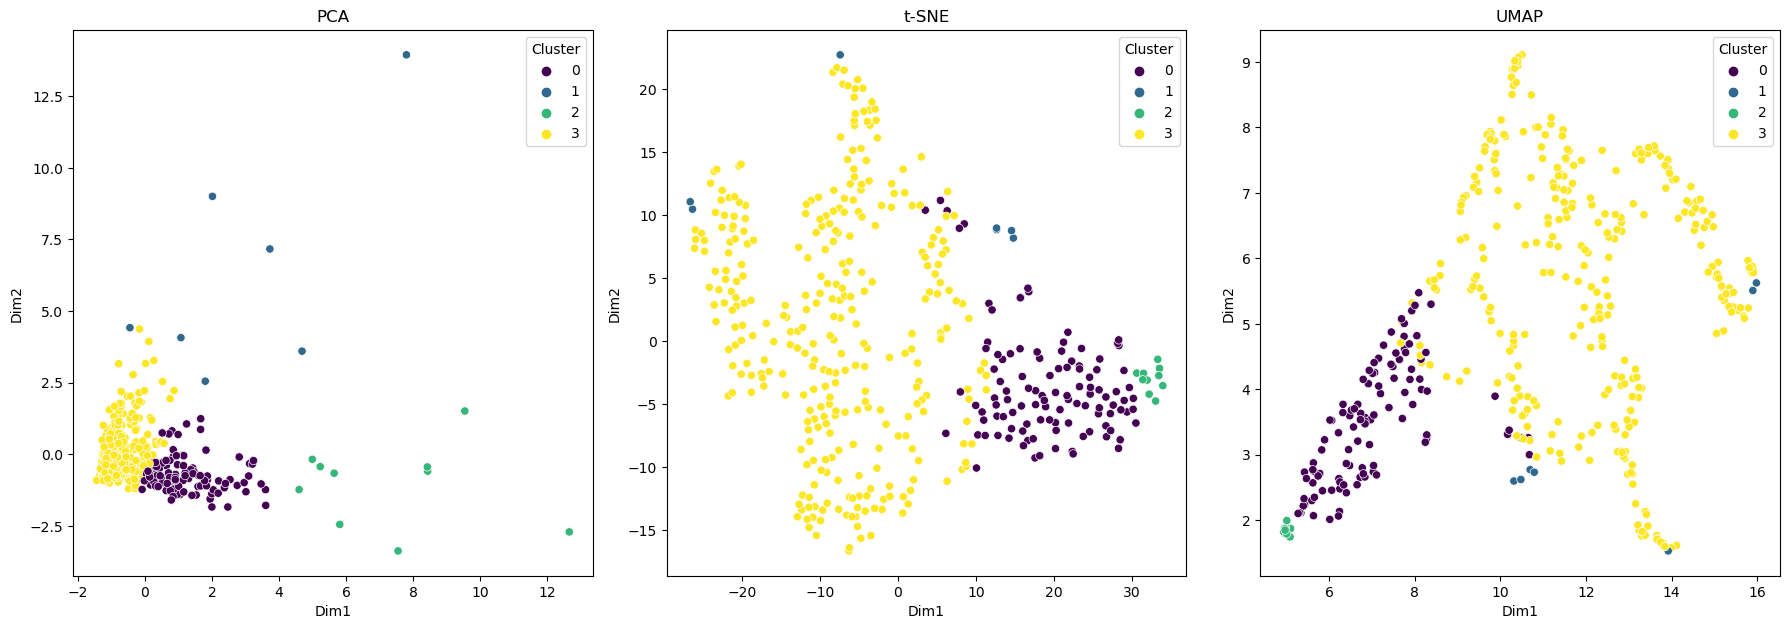

In [45]:
# Initialize different dimensionality reduction methods
methods = {
    'PCA': PCA(n_components=2),
    't-SNE': TSNE(n_components=2, random_state=42),
    'UMAP': umap.UMAP(n_components=2, random_state=42),
}

# Apply K-means clustering with k=4
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(scaled_features)
data['Cluster'] = kmeans.labels_

# Plot the results of each dimensionality reduction method
plt.figure(figsize=(18, 12))

for i, (name, method) in enumerate(methods.items()):
    reduced_data = method.fit_transform(scaled_features)
    df_reduced = pd.DataFrame(reduced_data, columns=['Dim1', 'Dim2'])
    df_reduced['Cluster'] = data['Cluster']
    
    plt.subplot(2, 3, i + 1)
    sns.scatterplot(x='Dim1', y='Dim2', hue='Cluster', palette='viridis', data=df_reduced)
    plt.title(name)

plt.tight_layout()
plt.show()

# Compare different clustering techniques:

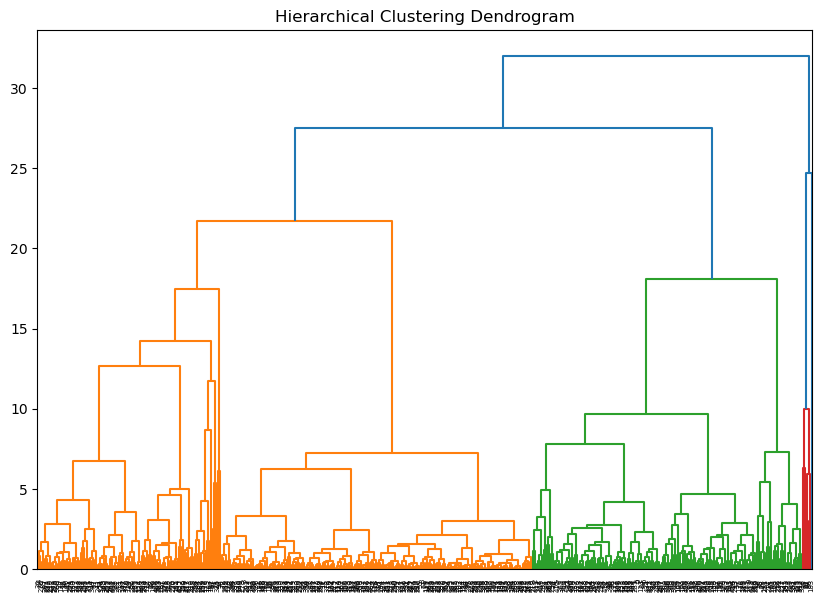

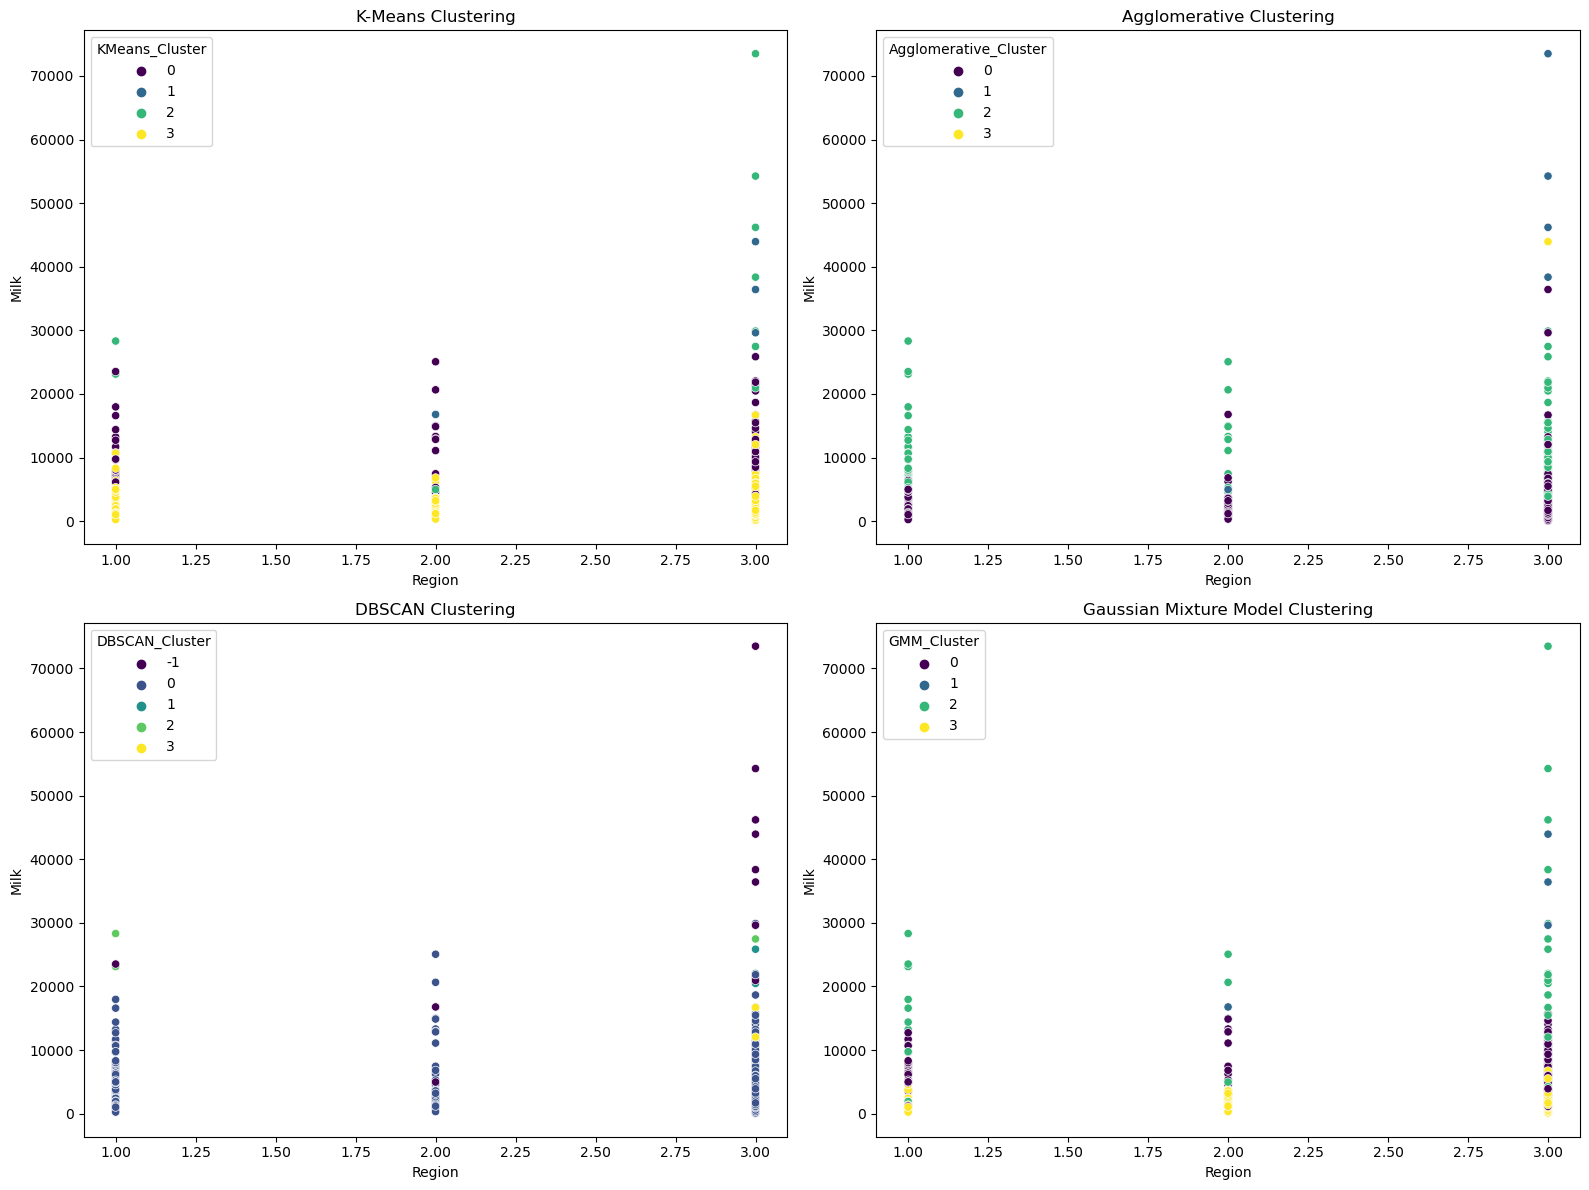

In [49]:

# 1. K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
data['KMeans_Cluster'] = kmeans.fit_predict(scaled_features)

# 2. Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=4)
data['Agglomerative_Cluster'] = agg_clustering.fit_predict(scaled_features)

# 3. DBSCAN Clustering
dbscan = DBSCAN(eps=1.5, min_samples=2)  # Adjust eps and min_samples as needed
data['DBSCAN_Cluster'] = dbscan.fit_predict(scaled_features)

# 4. Gaussian Mixture Model Clustering
gmm = GaussianMixture(n_components=4, random_state=42)
data['GMM_Cluster'] = gmm.fit_predict(scaled_features)

# 5. Hierarchical Clustering (Dendrogram)
linked = linkage(scaled_features, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', labels=data.index, distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

# Visualization of clustering results
plt.figure(figsize=(16, 12))

# K-Means
plt.subplot(2, 2, 1)
sns.scatterplot(x='Region', y='Milk', hue='KMeans_Cluster', palette='viridis', data=data)
plt.title('K-Means Clustering')

# Agglomerative Clustering
plt.subplot(2, 2, 2)
sns.scatterplot(x='Region', y='Milk', hue='Agglomerative_Cluster', palette='viridis', data=data)
plt.title('Agglomerative Clustering')

# DBSCAN
plt.subplot(2, 2, 3)
sns.scatterplot(x='Region', y='Milk', hue='DBSCAN_Cluster', palette='viridis', data=data)
plt.title('DBSCAN Clustering')

# Gaussian Mixture Model
plt.subplot(2, 2, 4)
sns.scatterplot(x='Region', y='Milk', hue='GMM_Cluster', palette='viridis', data=data)
plt.title('Gaussian Mixture Model Clustering')

plt.tight_layout()
plt.show()

In [51]:
# Dictionary to store silhouette scores
silhouette_scores_1 = {}

# Compute silhouette scores for each method
silhouette_scores_1['K-Means'] = silhouette_score(pca_components, kmeans.labels_)
silhouette_scores_1['Agglomerative'] = silhouette_score(pca_components, data['Agglomerative_Cluster'])
silhouette_scores_1['DBSCAN'] = silhouette_score(pca_components, data['DBSCAN_Cluster'])
silhouette_scores_1['GMM'] = silhouette_score(pca_components,data['GMM_Cluster'])

# Print silhouette scores
for method, score in silhouette_scores_1.items():
    print(f'{method}: Silhouette Score = {score:.4f}')

K-Means: Silhouette Score = 0.4790
Agglomerative: Silhouette Score = 0.3664
DBSCAN: Silhouette Score = 0.3289
GMM: Silhouette Score = 0.2417


 ## K-Means appears to be the most effective clustering algorithm when compared to other algorithm

Cluster Labels: [0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 2 1 0 0 0 2 1 0 0 0 1 0 0 1
 0 0 1 1 0 0 2 0 2 2 2 0 2 0 0 1 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 0 1 1 0 0
 0 0 0 2 0 0 0 0 0 0 0 2 2 1 0 0 0 0 2 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 2 0 0
 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 1 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 2 2 1 0 0 2 0 0 0 2 0 2 0 0 0 0 2 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 2 0 0 0 1 0 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 2 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 1 0 0 0 0 0 2 0
 2 1 0 0 0 0 0 0 0 0 2 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1 2 0 0]
Cluster Centers:
 [[-0.24260351 -0.21266148 -0.22157224 -0.18656872 -0.20323381 -0.15007652

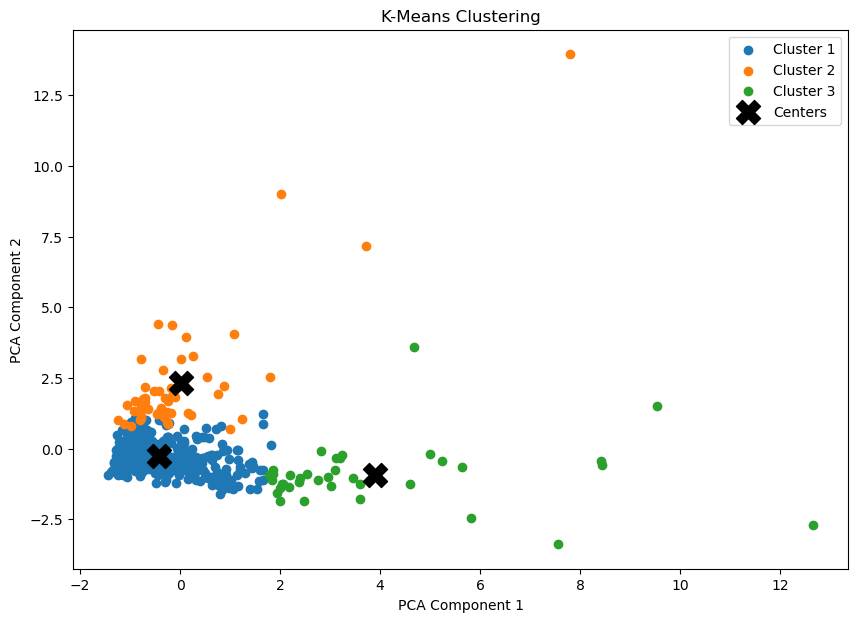

In [53]:
# Apply KMeans
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(scaled_features)

# Set the number of clusters (k)
k = 3  # Replace with the optimal number of clusters you want to use
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)
# Get cluster labels
clusters = kmeans.labels_
# Get cluster centers
centers = kmeans.cluster_centers_

# View the results
print("Cluster Labels:", clusters)
print("Cluster Centers:\n", centers)

# Reduce data to 2D for visualization using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the clusters
plt.figure(figsize=(10, 7))
for cluster in range(k):
    plt.scatter(X_pca[clusters == cluster, 0], X_pca[clusters == cluster, 1], label=f'Cluster {cluster + 1}')

# Plot the cluster centers
centers_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], s=300, c='black', marker='X', label='Centers')

plt.title('K-Means Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

## K-Means Clustering:

#### K-Means was identified as the most effective clustering algorithm for this dataset. It yielded the highest silhouette score, indicating well-separated and distinct clusters.
#### The optimal number of clusters was determined to be 3, balancing the inertia and silhouette scores.

## Dimensionality Reduction:

#### PCA was the most effective dimensionality reduction method, preserving the cluster structure better than t-SNE and UMAP.

## Other Clustering Techniques:

#### While Agglomerative Clustering also produced reasonable results, it was less effective than K-Means.
#### DBSCAN and GMM struggled to identify distinct clusters in this dataset, as reflected in their lower silhouette scores.

## Overall Recommendation:

#### Use K-Means clustering with k=3 as the final model for customer segmentation in this dataset.
#### PCA can be used for dimensionality reduction to visualize the clusters effectively.

##### Based on the analysis, it is recommended that the wholesale distributor segments its customers into three main clusters. Each cluster represents a distinct group of customers with similar purchasing patterns. By tailoring services and marketing efforts to these specific clusters, the distributor can more effectively meet the needs of its diverse customer base.

##### Cluster 1: Focus on customers with high spending on Grocery and Detergents_Paper.
##### Cluster 2: Target customers with a balanced spending profile across all categories.
##### Cluster 3: Cater to customers with a preference for Fresh, Frozen, and Delicatessen products.
##### This clustering approach provides actionable insights that can drive more efficient operations, targeted marketing, and improved customer satisfaction.